<a href="https://colab.research.google.com/github/TanishqRajoria/Dog_vs_Cat/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:50<00:00, 24.4MB/s]
100% 1.06G/1.06G [00:51<00:00, 22.4MB/s]


In [9]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
import tensorflow as tf
from tensorflow.keras import models,Sequential,layers

In [11]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [12]:
train_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [13]:
test_df=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [14]:
def process(image,labels):
  image=tf.cast(image/255,tf.float32)
  return image,labels

In [15]:
train_df=train_df.map(process)

In [16]:
test_df=test_df.map(process)

In [17]:
model=Sequential()

In [24]:
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='valid',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='valid'))
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='valid'))
model.add(layers.MaxPooling2D((2,2),strides=2,padding='valid'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
history=model.fit(train_df,epochs=10,validation_data=train_df)

Epoch 1/10
625/625 [==============================] - 168s 242ms/step - loss: 0.6933 - accuracy: 0.4934 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
625/625 [==============================] - 150s 240ms/step - loss: 0.6932 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
625/625 [==============================] - 140s 223ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
625/625 [==============================] - 151s 241ms/step - loss: 0.6932 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
625/625 [==============================] - 139s 222ms/step - loss: 0.6932 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
625/625 [==============================] - 141s 225ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
625/625 [==============================] - 151s 241ms/step - loss: 0.6932 - accuracy: 0.4928 - val_loss: 0.6932 -

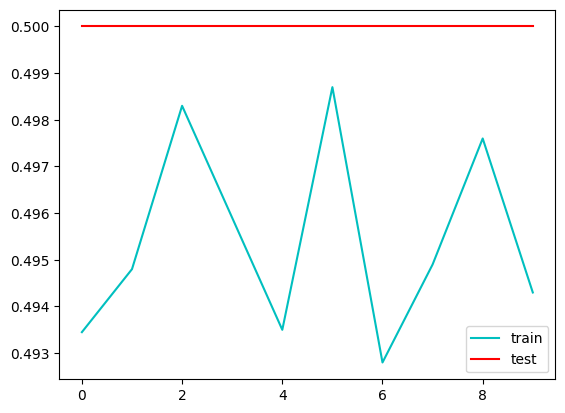

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='c',label='train')
plt.plot(history.history['val_accuracy'],color='r',label='test')
plt.legend()
plt.show()

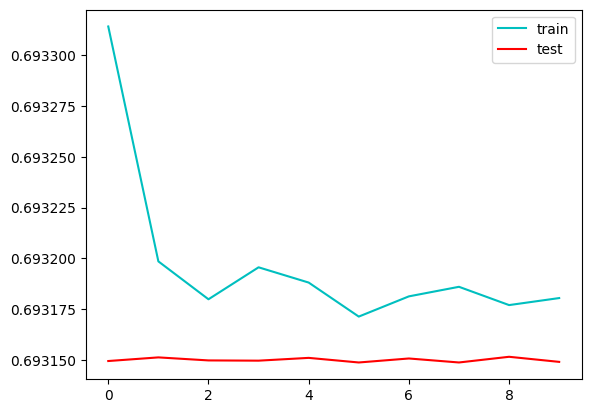

In [28]:

plt.plot(history.history['loss'],color='c',label='train')
plt.plot(history.history['val_loss'],color='r',label='test')
plt.legend()
plt.show()